In [4]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
rnd = np.random.RandomState(seed=42)

In [63]:
n_data = 16 # number of data points
a_true = -2 # randomly chosen truth
b_true = 6.5

In [69]:
# # randomly generate some x values over some domain by sampling from a uniform distribution
# x = rnd.uniform(0, 2., n_data)
# x.sort() # sort the values in place

# # evaluate the true model at the given x values
# y = a_true*x + b_true

# # Heteroscedastic Gaussian uncertainties only in y direction
# y_err = rnd.uniform(0.1, 0.2, size=n_data) # randomly generate uncertainty for each datum
# y = rnd.normal(y, y_err) # re-sample y data with noise

x = np.array([0.743481,   0.85057267, 0.85806383, 0.93786017, 0.93840019, 0.9409362,
 0.9416173,  0.94318625, 0.94477032, 1.01263906, 1.01814232, 1.02378917,
 1.02967624, 1.03977177, 1.09788041, 1.13532296, 1.14926229, 1.15175505,
 1.23794601, 1.25442974, 1.25677043, 1.25853645, 1.33332847, 1.33879837,
 1.36216175, 1.59938609, 1.6034266,  1.6049128,  1.61201557, 1.6144267,
 1.61598977, 1.6627268,  1.75541809, 1.76295289, 1.87553585, 1.87584734,
 1.8763296,  2.00993986, 2.01469943, 2.01728851, 2.09165658, 2.13986669,
 2.24497278, 2.3019236,  2.33453032, 2.34928734, 2.48488935])
y = np.array([4.97451749, 4.68845696, 4.44019159, 4.69867934, 5.06802909, 4.18599534,
 5.01888757, 5.47738814, 4.44114738, 4.52074049, 4.94828311, 4.1841912,
 4.28700162, 3.85407182, 4.36488175, 4.25776859, 4.04980729, 4.24020575,
 3.63542297, 3.12125957, 3.23114921, 3.17037207, 3.88897456, 2.59782361,
 2.72203644, 2.6860877,  2.07121715, 2.03062831, 3.32451923, 2.54360879,
 2.13523066, 1.97659721, 2.85116531, 2.23692959, 1.98087005, 1.57971983,
 2.16847309, 1.59381963, 2.26757831, 1.94398518, 2.18792797, 1.71195364,
 1.82730901, 2.17813103, 0.84302375, 1.62182506, 1.68835476])
y_err = np.array([0.54948828, 0.39825036, 0.44498959, 0.34359786, 0.27912445, 0.362243,
 0.34747945, 0.16003181, 0.12884851, 0.52757335, 0.25876558, 0.26473464,
 0.40309996, 0.25031496, 0.4002357,  0.13442941, 0.39982577, 0.34037689,
 0.31740933, 0.67935151, 0.21768367, 0.30855588, 0.13675777, 0.16953091,
 0.13522792, 0.33533393, 0.23307743, 0.21030997, 0.17295956, 0.22333407,
 0.2265138,  0.2411957,  0.33190389, 0.25802374, 0.40187523, 0.31346519,
 0.23652152, 0.20918489, 0.03313569, 0.19533992, 0.26446563, 0.27559163,
 0.16342514, 0.15410131, 0.08315507, 0.10059263, 0.15609746])

n_data = len(x)

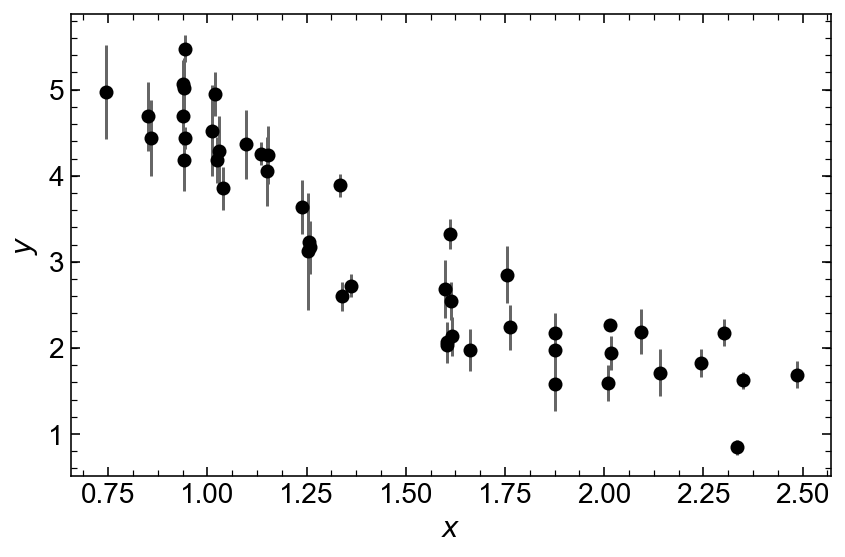

In [59]:
datastyle = dict(linestyle='none', marker='o', color='k', ecolor='#666666')
plt.errorbar(x, y, y_err, **datastyle)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()


In [60]:
def line_model(pars, x):
    """
    Evaluate a straight line model at the input x values.
    
    Parameters
    ----------
    pars : list, array
        This should be a length-2 array or list containing the 
        parameter values (a, b) for the (slope, intercept).
    x : numeric, list, array
        The coordinate values.
        
    Returns
    -------
    y : array
        The computed y values at each input x.
    """
    return pars[0]*np.array(x) + pars[1]

def weighted_absolute_deviation(pars, x, y, y_err):
    """
    Compute the weighted absolute deviation between the data 
    (x, y, y_err) and the model points computed with the input 
    parameters (pars).
    """
    chi = (y - line_model(pars, x)) / y_err
    return np.sum(np.abs(chi))

def weighted_squared_deviation(pars, x, y, y_err):
    """
    Compute the weighted squared deviation between the data 
    (x, y, y_err) and the model points computed with the input 
    parameters (pars).
    """
    chi = (y - line_model(pars, x)) / y_err
    return np.sum(chi**2)

In [65]:
# make a 256x256 grid of parameter values centered on the true values
a_grid = np.linspace(a_true-2., a_true+2, 256)
b_grid = np.linspace(b_true-2., b_true+2, 256)
a_grid,b_grid = np.meshgrid(a_grid, b_grid)
ab_grid = np.vstack((a_grid.ravel(), b_grid.ravel())).T

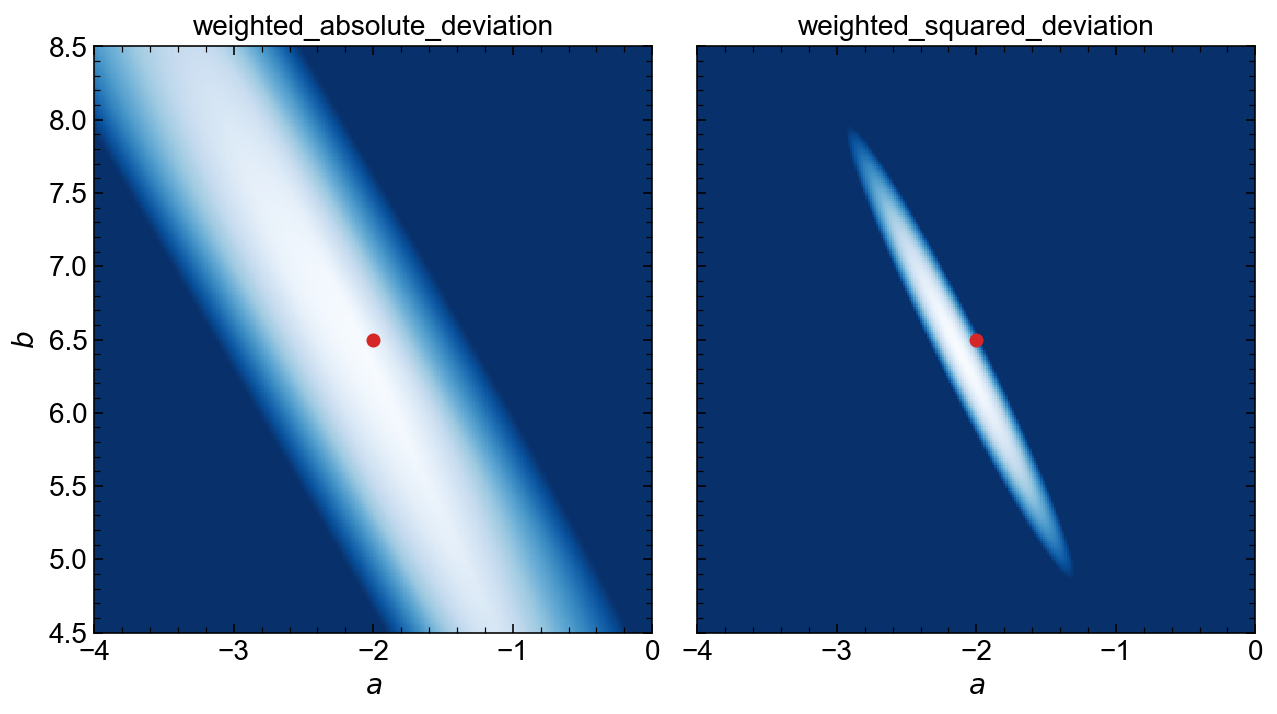

In [66]:
fig,axes = plt.subplots(1, 2, figsize=(9,5.1), sharex=True, sharey=True)

for i,func in enumerate([weighted_absolute_deviation, weighted_squared_deviation]):
    func_vals = np.zeros(ab_grid.shape[0])
    for j,pars in enumerate(ab_grid):
        func_vals[j] = func(pars, x, y, y_err)

    axes[i].pcolormesh(a_grid, b_grid, func_vals.reshape(a_grid.shape), 
                       cmap='Blues', vmin=func_vals.min(), vmax=func_vals.min()+256) # arbitrary scale
    
    axes[i].set_xlabel('$a$')
    
    # plot the truth
    axes[i].plot(a_true, b_true, marker='o', zorder=10, color='tab:red')
    axes[i].axis('tight')
    axes[i].set_title(func.__name__, fontsize=14)

axes[0].set_ylabel('$b$')

fig.tight_layout()

In [67]:
x0 = [1., -1.] # starting guess for the optimizer 

result_abs = minimize(weighted_absolute_deviation, x0=x0, 
                      args=(x, y, y_err), # passed to the weighted_*_deviation function after pars 
                      method='BFGS') # similar to Newton's method

result_sq = minimize(weighted_squared_deviation, x0=x0, 
                     args=(x, y, y_err), # passed to the weighted_*_deviation function after pars
                     method='BFGS')

best_pars_abs = result_abs.x
best_pars_sq = result_sq.x

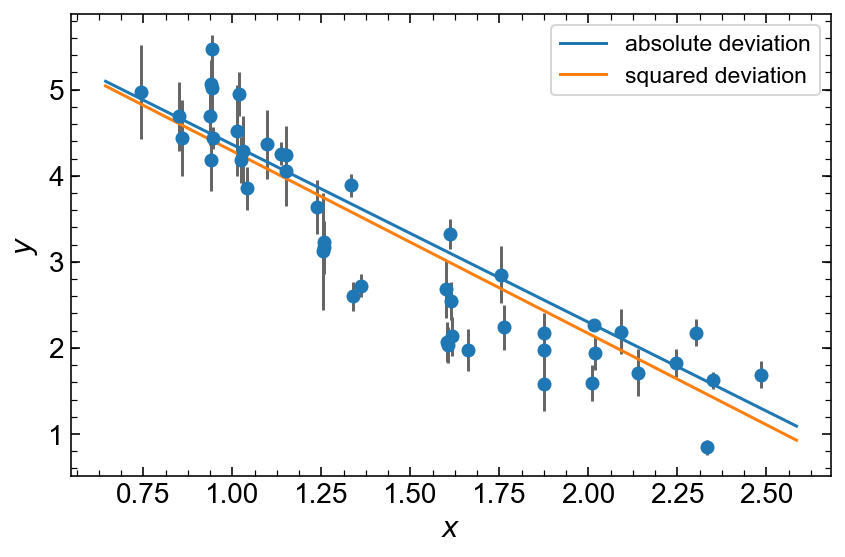

In [70]:
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')

x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 128)
plt.plot(x_grid, line_model(best_pars_abs, x_grid), 
         marker='', linestyle='-', label='absolute deviation')
plt.plot(x_grid, line_model(best_pars_sq, x_grid), 
         marker='', linestyle='-', label='squared deviation')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='best')
plt.tight_layout()

In [71]:
# create matrices and vectors:

# learn this is a magical function - it makes exactly what we want for the design matrix
X = np.vander(x, N=2, increasing=True) 

# you never want to do this in practice because the matrix will just be full of zeros!
#   that's a good way to waste all of your RAM on storing zeros...
Cov = np.diag(y_err**2)
Cinv = np.linalg.inv(Cov) # we need the inverse covariance matrix

X.shape, Cov.shape, y.shape

((47, 2), (47, 47), (47,))

In [72]:
# using the new Python matrix operator
best_pars_linalg = np.linalg.inv(X.T @ Cinv @ X) @ (X.T @ Cinv @ y)

# we can also get the parameter covariance matrix
pars_Cov = np.linalg.inv(X.T @ Cinv @ X)

In [73]:
best_pars_sq - best_pars_linalg[::-1]

array([-5.55110464e-08,  9.43751619e-08])

In [74]:
# some tricks to get info we need to plot an ellipse, aligned with 
#    the eigenvectors of the covariance matrix
eigval,eigvec = np.linalg.eig(pars_Cov)
angle = np.degrees(np.arctan2(eigvec[1,0], eigvec[0,0]))
w,h = 2*np.sqrt(eigval)

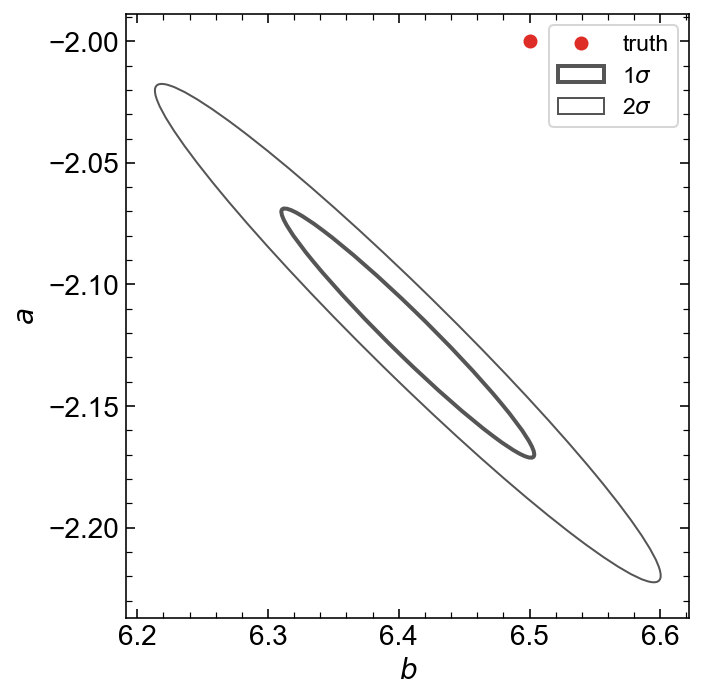

In [75]:
from matplotlib.patches import Ellipse

fig,ax = plt.subplots(1, 1, figsize=(5,5))

for n in [1,2]:
    ax.add_patch(Ellipse(best_pars_linalg, width=n*w, height=n*h, angle=angle, 
                         fill=False, linewidth=3-n, edgecolor='#555555', 
                         label=r'{}$\sigma$'.format(n)))

ax.plot(b_true, a_true, marker='o', zorder=10, linestyle='none',
        color='#de2d26', label='truth')

ax.set_xlabel('$b$')
ax.set_ylabel('$a$')
ax.legend(loc='best')

fig.tight_layout()

In [80]:
class StraightLineModel(object):
    
    def __init__(self, x, y, y_err):
        """ 
        We store the data as attributes of the object so we don't have to 
        keep passing it in to the methods that compute the probabilities.
        """
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.y_err = np.asarray(y_err)

    def ln_likelihood(self, pars):
        """
        We don't need to pass in the data because we can access it from the
        attributes. This is basically the same as the weighted squared 
        deviation function, but includes the constant normalizations for the
        Gaussian likelihood.
        """
        N = len(self.y)
        dy = self.y - line_model(pars, self.x)
        ivar = 1 / self.y_err**2 # inverse-variance
        return -0.5 * (N*np.log(2*np.pi) + np.sum(2*np.log(self.y_err)) + np.sum(dy**2 * ivar))

    def ln_prior(self, pars):
        """ 
        The prior only depends on the parameters, so we don't need to touch
        the data at all. We're going to implement a flat (uniform) prior 
        over the ranges:
            a : [0, 100]
            b : [-50, 50]
        
        """
        
        a, b = pars # unpack parameters
        ln_prior_val = 0. # we'll add to this

        if a > 0 or a < -100.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        if b < -50 or b > 50.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        return ln_prior_val

    def ln_posterior(self, pars):
        """ 
        Up to a normalization constant, the log of the posterior pdf is just 
        the sum of the log likelihood plus the log prior.
        """
        lnp = self.ln_prior(pars)
        if np.isinf(lnp): # short-circuit if the prior is infinite (don't bother computing likelihood)
            return lnp

        lnL = self.ln_likelihood(pars)
        lnprob = lnp + lnL

        if np.isnan(lnprob):
            return -np.inf

        return lnprob
    
    def __call__(self, pars):
        return self.ln_posterior(pars)

In [81]:
model = StraightLineModel(x, y, y_err)


In [82]:
def evaluate_on_grid(func, a_grid, b_grid, args=()):
    a_grid,b_grid = np.meshgrid(a_grid, b_grid)
    ab_grid = np.vstack((a_grid.ravel(), b_grid.ravel())).T
    
    func_vals = np.zeros(ab_grid.shape[0])
    for j,pars in enumerate(ab_grid):
        func_vals[j] = func(pars, *args)
        
    return func_vals.reshape(a_grid.shape)

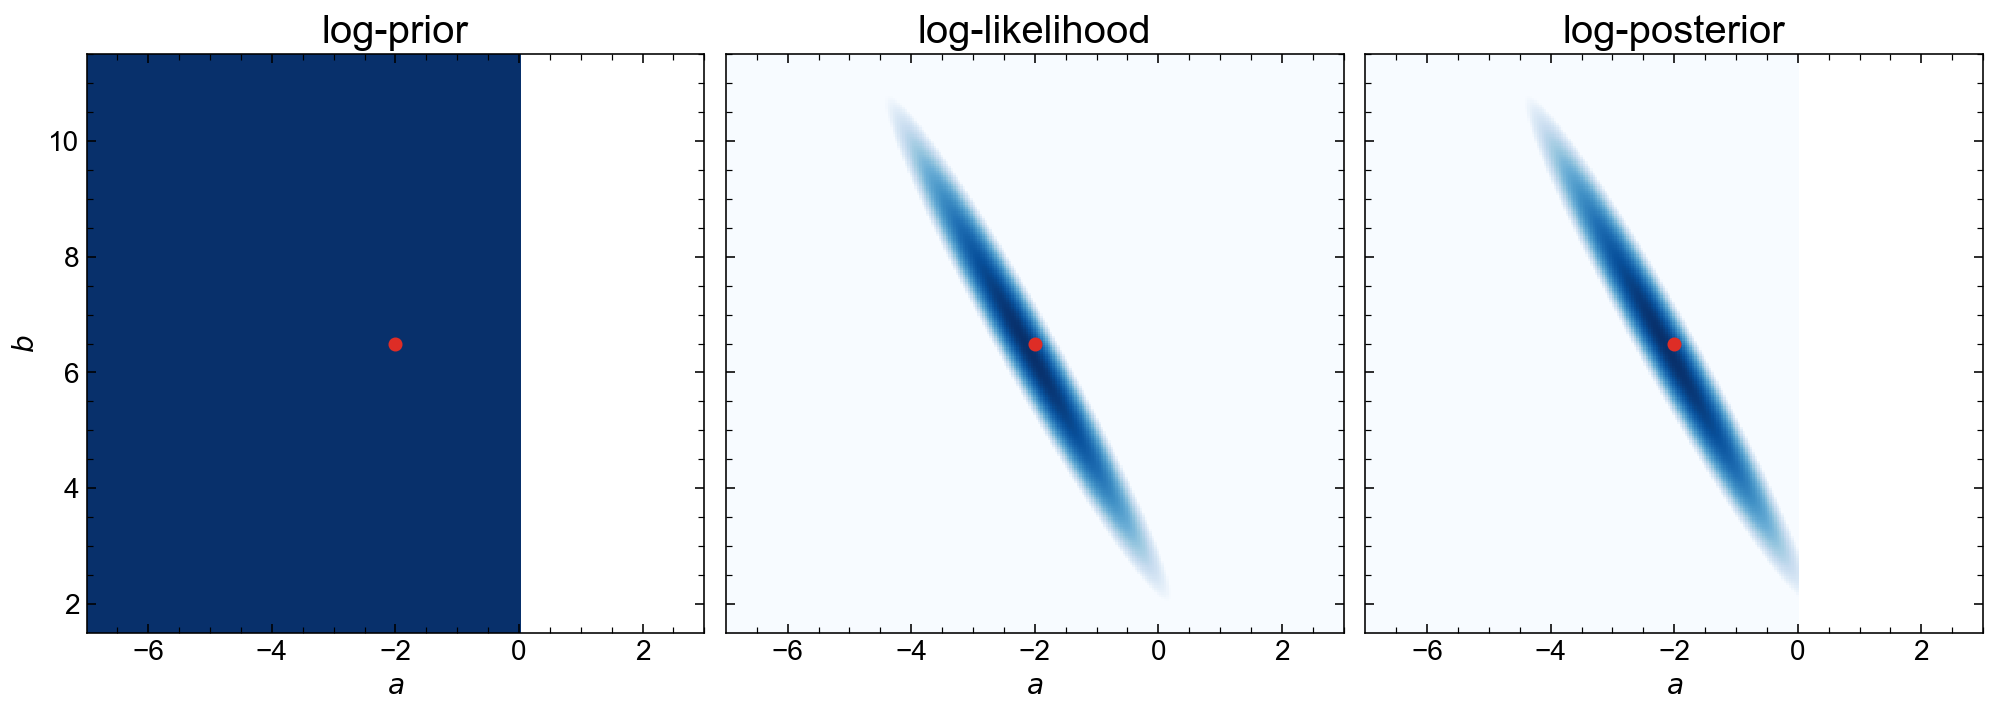

In [83]:
fig,axes = plt.subplots(1, 3, figsize=(14,5.1), sharex=True, sharey=True)

# make a 256x256 grid of parameter values centered on the true values
a_grid = np.linspace(a_true-5., a_true+5, 256)
b_grid = np.linspace(b_true-5., b_true+5, 256)

ln_prior_vals = evaluate_on_grid(model.ln_prior, a_grid, b_grid)
ln_like_vals = evaluate_on_grid(model.ln_likelihood, a_grid, b_grid)
ln_post_vals = evaluate_on_grid(model.ln_posterior, a_grid, b_grid)

for i,vals in enumerate([ln_prior_vals, ln_like_vals, ln_post_vals]):
    axes[i].pcolormesh(a_grid, b_grid, vals, 
                       cmap='Blues', vmin=vals.max()-1024, vmax=vals.max()) # arbitrary scale
    
axes[0].set_title('log-prior', fontsize=20)
axes[1].set_title('log-likelihood', fontsize=20)
axes[2].set_title('log-posterior', fontsize=20)
    
for ax in axes:
    ax.set_xlabel('$a$')
    
    # plot the truth
    ax.plot(a_true, b_true, marker='o', zorder=10, color='#de2d26')
    ax.axis('tight')

axes[0].set_ylabel('$b$')

fig.tight_layout()

In [87]:
class StraightLineModelGaussianPrior(StraightLineModel): # verbose names are a good thing!
    
    def ln_prior(self, pars):
        a, b = pars # unpack parameters
        ln_prior_val = 0. # we'll add to this
    
        # prior on a is a Gaussian with mean, stddev = (3, 0.05)
        ln_prior_val += -0.5*(a + 2.)**2/0.05**2 # this is not normalized properly, but that's ok
        
        # prior on b is a Gaussian with mean, stddev = (5.5, 0.05)
        ln_prior_val += -0.5*(b - 5.5)**2/0.05**2 # this is not normalized properly, but that's ok

        return ln_prior_val

In [88]:
model_Gprior = StraightLineModelGaussianPrior(x, y, y_err)


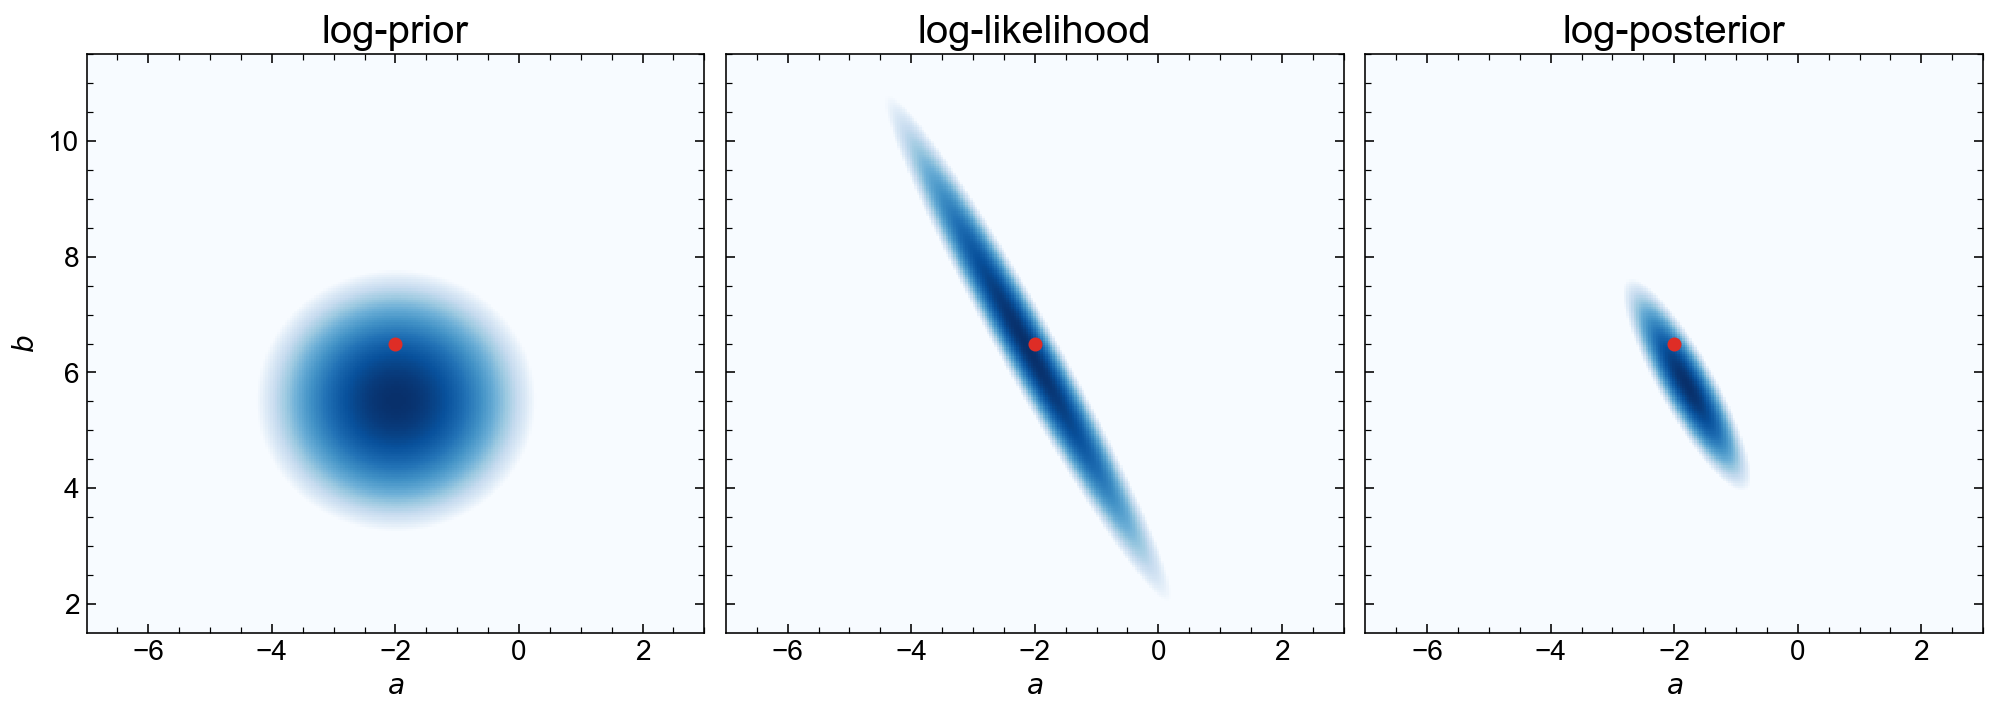

In [89]:
fig,axes = plt.subplots(1, 3, figsize=(14,5.1), sharex=True, sharey=True)

ln_prior_vals2 = evaluate_on_grid(model_Gprior.ln_prior, a_grid, b_grid)
ln_like_vals2 = evaluate_on_grid(model_Gprior.ln_likelihood, a_grid, b_grid)
ln_post_vals2 = evaluate_on_grid(model_Gprior.ln_posterior, a_grid, b_grid)

for i,vals in enumerate([ln_prior_vals2, ln_like_vals2, ln_post_vals2]):
    axes[i].pcolormesh(a_grid, b_grid, vals, 
                       cmap='Blues', vmin=vals.max()-1024, vmax=vals.max()) # arbitrary scale
    
axes[0].set_title('log-prior', fontsize=20)
axes[1].set_title('log-likelihood', fontsize=20)
axes[2].set_title('log-posterior', fontsize=20)
    
for ax in axes:
    ax.set_xlabel('$a$')
    
    # plot the truth
    ax.plot(a_true, b_true, marker='o', zorder=10, color='#de2d26')
    ax.axis('tight')

axes[0].set_ylabel('$b$')

fig.tight_layout()

In [90]:
def sample_proposal(*sigmas):
    return np.random.normal(0., sigmas)

def run_metropolis_hastings(p0, n_steps, model, proposal_sigmas):
    """
    Run a Metropolis-Hastings MCMC sampler to generate samples from the input
    log-posterior function, starting from some initial parameter vector.
    
    Parameters
    ----------
    p0 : iterable
        Initial parameter vector.
    n_steps : int
        Number of steps to run the sampler for.
    model : StraightLineModel instance (or subclass)
        A callable object that takes a parameter vector and computes 
        the log of the posterior pdf.
    proposal_sigmas : list, array
        A list of standard-deviations passed to the sample_proposal 
        function. These are like step sizes in each of the parameters.
    """
    p0 = np.array(p0)
    if len(proposal_sigmas) != len(p0):
        raise ValueError("Proposal distribution should have same shape as parameter vector.")
    
    # the objects we'll fill and return:
    chain = np.zeros((n_steps, len(p0))) # parameter values at each step
    ln_probs = np.zeros(n_steps) # log-probability values at each step
    
    # we'll keep track of how many steps we accept to compute the acceptance fraction                        
    n_accept = 0 
    
    # evaluate the log-posterior at the initial position and store starting position in chain
    ln_probs[0] = model(p0)
    chain[0] = p0
    
    # loop through the number of steps requested and run MCMC
    for i in range(1,n_steps):
        # proposed new parameters
        step = sample_proposal(*proposal_sigmas)
        new_p = chain[i-1] + step
        
        # compute log-posterior at new parameter values
        new_ln_prob = model(new_p)
        
        # log of the ratio of the new log-posterior to the previous log-posterior value
        ln_prob_ratio = new_ln_prob - ln_probs[i-1]
        
        if (ln_prob_ratio > 0) or (ln_prob_ratio > np.log(np.random.uniform())):
            chain[i] = new_p
            ln_probs[i] = new_ln_prob
            n_accept += 1
            
        else:
            chain[i] = chain[i-1]
            ln_probs[i] = ln_probs[i-1]
    
    acc_frac = n_accept / n_steps
    return chain, ln_probs, acc_frac

In [101]:
p0 = [-1,5]
chain,_,acc_frac = run_metropolis_hastings(p0, n_steps=8192, model=model, 
                                           proposal_sigmas=[0.05,0.05])
print("Acceptance fraction: {:.1%}".format(acc_frac))

Acceptance fraction: 23.4%


Text(21.875,0.5,'$b$')

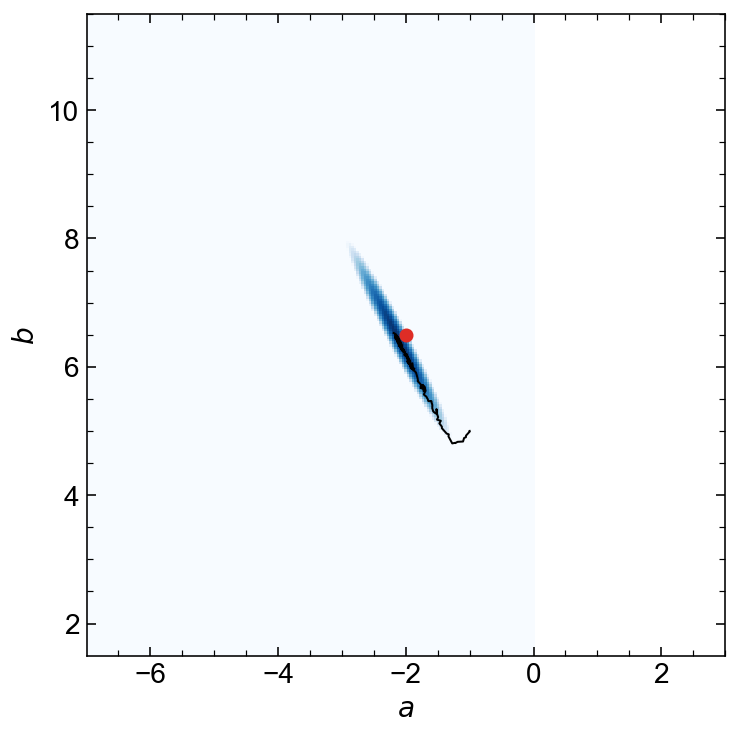

In [102]:
fig,ax = plt.subplots(1, 1, figsize=(5,5))

ax.pcolormesh(a_grid, b_grid, ln_post_vals, 
              cmap='Blues', vmin=ln_post_vals.max()-128, vmax=ln_post_vals.max()) # arbitrary scale
ax.axis('tight')

fig.tight_layout()

ax.plot(a_true, b_true, marker='o', zorder=10, color='#de2d26')
ax.plot(chain[:512,0], chain[:512,1], marker='', color='k', linewidth=1.)

ax.set_xlabel('$a$')
ax.set_ylabel('$b$')

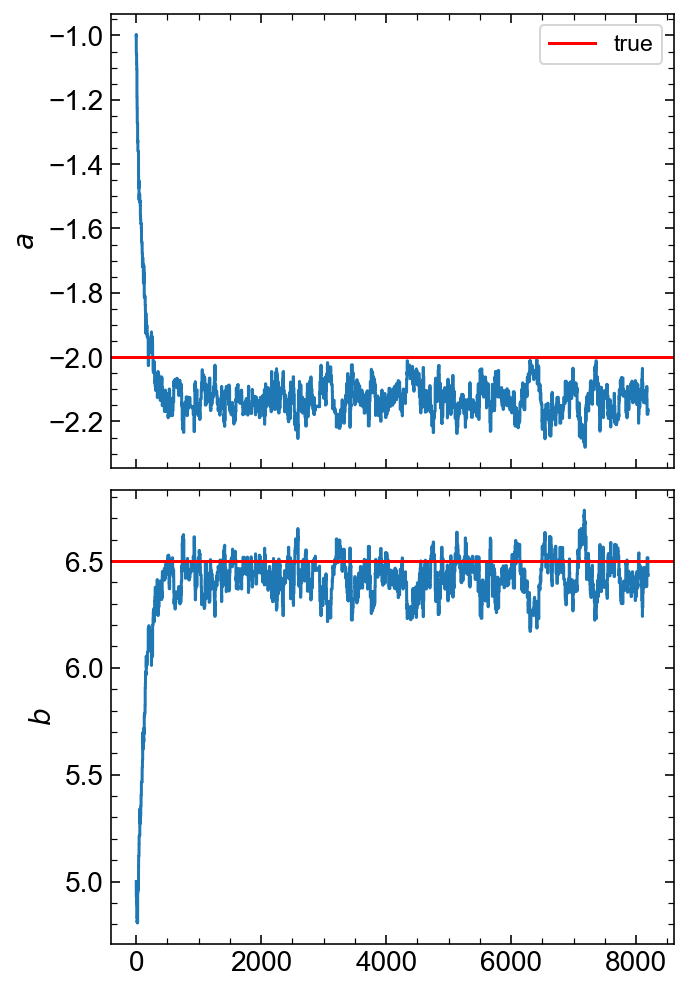

In [103]:
fig,axes = plt.subplots(len(p0), 1, figsize=(5,7), sharex=True)

for i in range(len(p0)):
    axes[i].plot(chain[:,i], marker='', drawstyle='steps')
    
axes[0].axhline(a_true, color='r', label='true')
axes[0].legend(loc='best')
axes[0].set_ylabel('$a$')

axes[1].axhline(b_true, color='r')
axes[1].set_ylabel('$b$')

fig.tight_layout()

In [104]:
good_samples = chain[2000::8]
good_samples.shape

(774, 2)

In [105]:
low,med,hi = np.percentile(good_samples, [16, 50, 84], axis=0)
upper, lower = hi-med, med-low

disp_str = ""
for i,name in enumerate(['a', 'b']):
    fmt_str = '{name}={val:.2f}^{{+{plus:.2f}}}_{{-{minus:.2f}}}'
    disp_str += fmt_str.format(name=name, val=med[i], plus=upper[i], minus=lower[i])
    disp_str += r'\quad '
    
disp_str = "${}$".format(disp_str)
display.Latex(data=disp_str)

<IPython.core.display.Latex object>

In [106]:
a_true, b_true


(-2, 6.5)

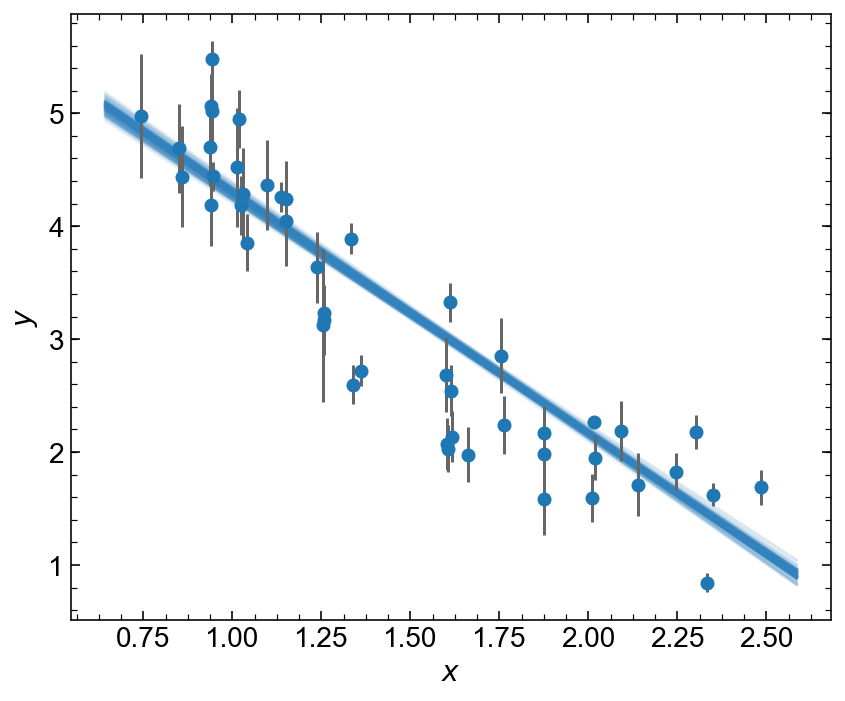

In [107]:
plt.figure(figsize=(6,5))
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')

x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 128)
for pars in good_samples[:128]: # only plot 128 samples
    plt.plot(x_grid, line_model(pars, x_grid), 
             marker='', linestyle='-', color='#3182bd', alpha=0.1, zorder=-10)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()

In [108]:
import corner


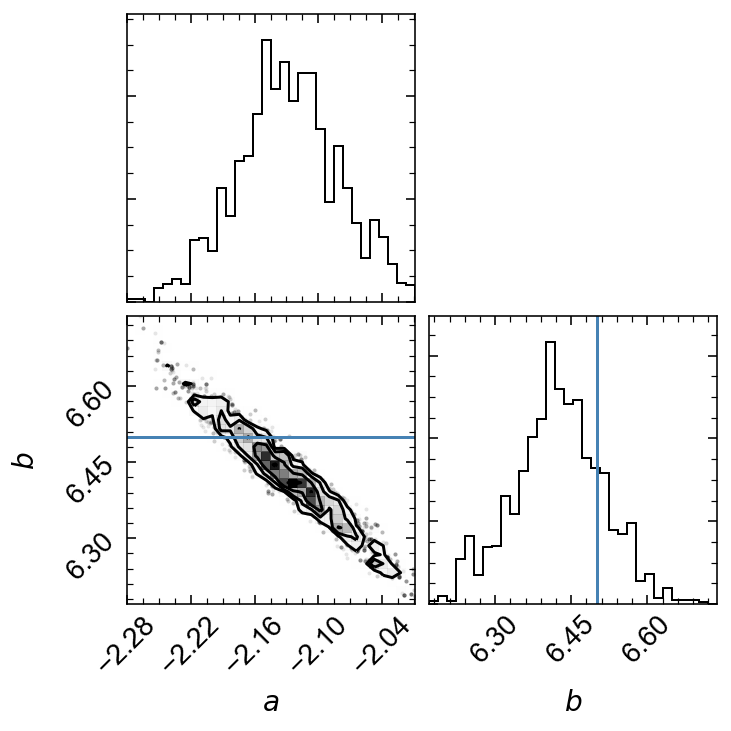

In [109]:
fig = corner.corner(chain[2000:], bins=32, labels=['$a$', '$b$'], truths=[a_true, b_true])


In [110]:
V_true = 0.1**2
# n_data = 42

# we'll keep the same parameters for the line as we used above

In [41]:
# x = rnd.uniform(0, 2., n_data)
# x.sort() # sort the values in place

# y = a_true*x + b_true

# # Heteroscedastic Gaussian uncertainties only in y direction
# y_err = rnd.uniform(0.1, 0.2, size=n_data) # randomly generate uncertainty for each datum

# # add Gaussian intrinsic width
# y = rnd.normal(y, np.sqrt(y_err**2 + V_true)) # re-sample y data with noise and intrinsic scatter

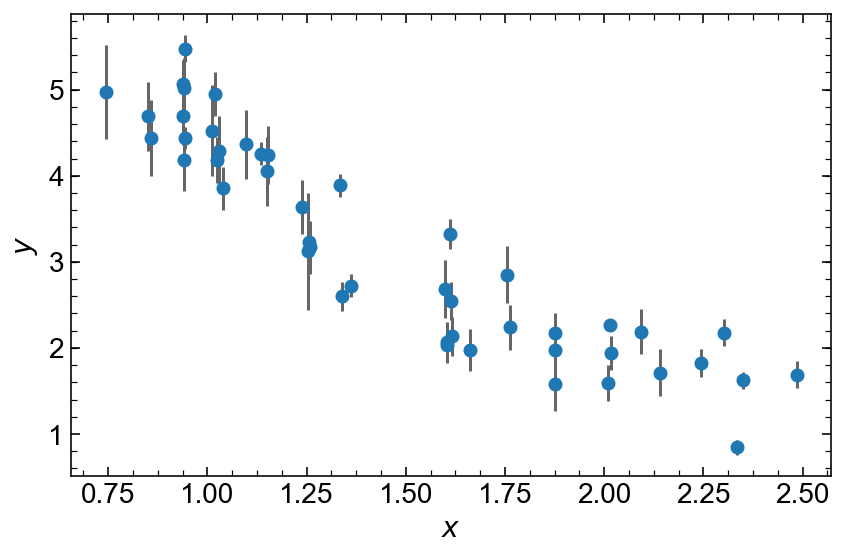

In [111]:
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()

In [112]:
X = np.vander(x, N=2, increasing=True) 
Cov = np.diag(y_err**2)
Cinv = np.linalg.inv(Cov)

In [113]:
best_pars = np.linalg.inv(X.T @ Cinv @ X) @ (X.T @ Cinv @ y)
pars_Cov = np.linalg.inv(X.T @ Cinv @ X)

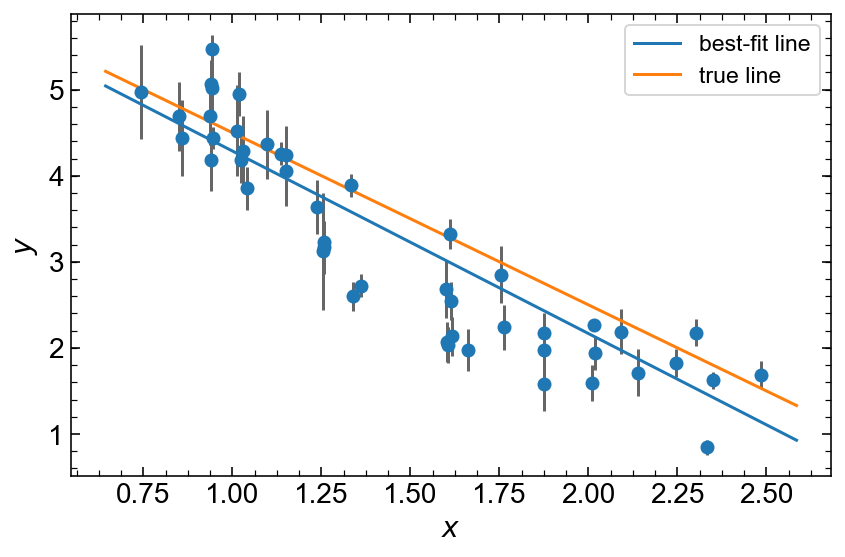

In [114]:
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')

x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 128)
plt.plot(x_grid, line_model(best_pars[::-1], x_grid), marker='', linestyle='-', label='best-fit line')
plt.plot(x_grid, line_model([a_true, b_true], x_grid), marker='', linestyle='-', label='true line')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='best')
plt.tight_layout()

In [115]:
pars_Cov


array([[ 0.00935203, -0.00482132],
       [-0.00482132,  0.00262457]])

In [116]:
class StraightLineIntrinsicScatterModel(StraightLineModel):

    def ln_prior(self, pars): 
        """ The prior only depends on the parameters """

        a, b, lnV = pars

        # flat priors on a, b, lnV
        if a < -10 or a > 10 or b < -100. or b > 100. or lnV < -10. or lnV > 10.:
            return -np.inf

        # this is only valid up to a numerical constant 
        return 0.
    
    def ln_likelihood(self, pars):
        """ The likelihood function evaluation requires a particular set of model parameters and the data """
        a,b,lnV = pars
        V = np.exp(lnV)

        N = len(y)
        dy = y - line_model([a,b], self.x)
        ivar = 1 / (self.y_err**2 + V) # inverse-variance now includes intrinsic scatter
        return -0.5 * (N*np.log(2*np.pi) - np.sum(np.log(ivar)) + np.sum(dy**2 * ivar))

In [117]:
scatter_model = StraightLineIntrinsicScatterModel(x, y, y_err)


In [118]:
x0 = [-2, 5., 0.] # starting guess for the optimizer 

# we have to minimize the negative log-likelihood to maximize the likelihood
result_ml_scatter = minimize(lambda *args: -scatter_model.ln_likelihood(*args), 
                             x0=x0, method='BFGS')
result_ml_scatter

      fun: 35.857503492720525
 hess_inv: array([[ 0.0260856 , -0.03942799, -0.0020582 ],
       [-0.03942799,  0.06595487,  0.00248592],
       [-0.0020582 ,  0.00248592,  0.06526924]])
      jac: array([-3.81469727e-06, -1.90734863e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 85
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([-2.27197906,  6.5359126 , -1.53710772])

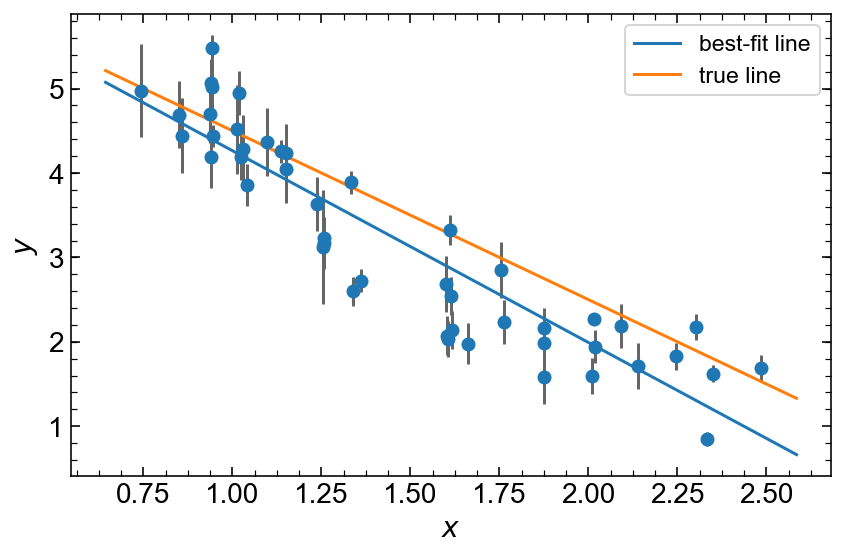

In [119]:
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')

x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 128)
plt.plot(x_grid, line_model(result_ml_scatter.x[:2], x_grid), marker='', linestyle='-', label='best-fit line')
plt.plot(x_grid, line_model([a_true, b_true], x_grid), marker='', linestyle='-', label='true line')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='best')
plt.tight_layout()

In [120]:
V_true, np.exp(result_ml_scatter.x[2])


(0.010000000000000002, 0.21500204869791104)

In [121]:
args

NameError: name 'args' is not defined